In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from scipy.stats import skew

In [445]:
data_url = "https://hbiostat.org/data/repo/diabetes.csv"
df = pd.read_csv(data_url)


In [446]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [448]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


In [449]:
print(df.duplicated().sum())

0


In [450]:
print(df.isnull().sum())  

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [451]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

          Missing Values  Percentage
chol                   1    0.248139
hdl                    1    0.248139
ratio                  1    0.248139
glyhb                 13    3.225806
height                 5    1.240695
weight                 1    0.248139
frame                 12    2.977667
bp.1s                  5    1.240695
bp.1d                  5    1.240695
bp.2s                262   65.012407
bp.2d                262   65.012407
waist                  2    0.496278
hip                    2    0.496278
time.ppn               3    0.744417


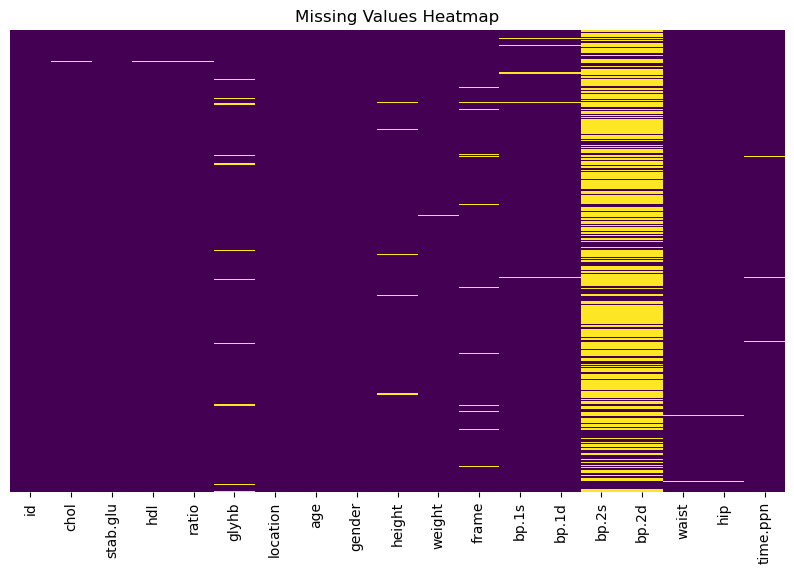

In [452]:
#Heat map to see missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [453]:
df = df.drop(columns=['bp.2s', 'bp.2d','id','location'])

In [454]:
print(df.isnull().sum())

chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64


In [455]:
num_cols_with_null = df.select_dtypes(include=['number']).columns
skew_values = df[num_cols_with_null].skew()

print("Skewness of Numerical Features with Missing Values:\n")
print(skew_values)

threshold = 1
skewed_cols = skew_values[abs(skew_values) > threshold].index

print("\nHighly Skewed Columns:")
print(skewed_cols)

Skewness of Numerical Features with Missing Values:

chol        0.930048
stab.glu    2.766131
hdl         1.196666
ratio       2.212431
glyhb       2.246125
age         0.321855
height      0.028040
weight      0.726112
bp.1s       1.110359
bp.1d       0.272454
waist       0.471359
hip         0.803650
time.ppn    1.212838
dtype: float64

Highly Skewed Columns:
Index(['stab.glu', 'hdl', 'ratio', 'glyhb', 'bp.1s', 'time.ppn'], dtype='object')


In [456]:
# Filling missing values based on the severity of skewness
for col in num_cols_with_null:
    if col in skewed_cols:
        df[col].fillna(df[col].median(), inplace=True)  
    else:
        df[col].fillna(df[col].mean(), inplace=True)  

# Verify all missing values are handled
print(df.isnull().sum())

chol         0
stab.glu     0
hdl          0
ratio        0
glyhb        0
age          0
gender       0
height       0
weight       0
frame       12
bp.1s        0
bp.1d        0
waist        0
hip          0
time.ppn     0
dtype: int64


In [457]:
cat_cols_with_null = df.select_dtypes(include=['object', 'category']).columns
missing_cat_values = df[cat_cols_with_null].isnull().sum()

missing_cat_values = missing_cat_values[missing_cat_values > 0]
print("Missing values in categorical columns:\n", missing_cat_values)

Missing values in categorical columns:
 frame    12
dtype: int64


In [458]:
for col in missing_cat_values.index:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the most frequent value

print("\nMissing values after imputation:\n", df[cat_cols_with_null].isnull().sum())


Missing values after imputation:
 gender    0
frame     0
dtype: int64


In [459]:
print(df.isnull().sum())

chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [460]:
df['gender'] = df['gender'].map({'female': 0, 'male': 1})

df['diabetes'] = (df['glyhb'] >= 6.5).astype(int)

In [461]:
df['height_m'] = df['height'] * 0.0254
df['weight_kg'] = df['weight'] * 0.453592


In [462]:
df['bmi'] = df['weight_kg'] / (df['height_m'] ** 2)

df['waist_hip_ratio'] = df['waist'] / df['hip']

In [463]:
df['age_40_plus'] = (df['age'] >= 40).astype(int)
df['age_50_plus'] = (df['age'] >= 50).astype(int)

df['male_over_45'] = ((df['gender'] == 1) & (df['age'] > 45)).astype(int)
df['female_over_55'] = ((df['gender'] == 0) & (df['age'] > 55)).astype(int)

In [464]:
original_cols_to_drop = ['id', 'height', 'weight', 'frame', 'location','hip','weight_kg', 'height_m']

In [465]:
df.drop(columns=original_cols_to_drop, inplace=True, errors='ignore')

In [466]:
print("\nNew features created:")
print(df.columns.tolist())
print("\nFinal dataset shape:", df.shape)


New features created:
['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'gender', 'bp.1s', 'bp.1d', 'waist', 'time.ppn', 'diabetes', 'bmi', 'waist_hip_ratio', 'age_40_plus', 'age_50_plus', 'male_over_45', 'female_over_55']

Final dataset shape: (403, 18)


In [467]:
X = df.drop(columns=['diabetes', 'glyhb'])  # Remove target and intermediate columns
y = df['diabetes']

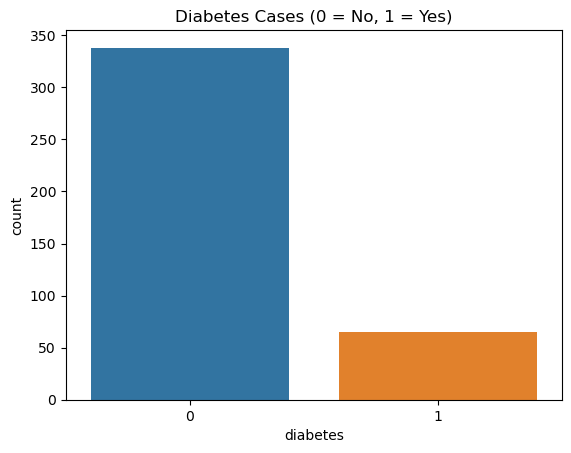

diabetes
0    0.83871
1    0.16129
Name: proportion, dtype: float64


In [468]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Cases (0 = No, 1 = Yes)")
plt.show()

print(df['diabetes'].value_counts(normalize=True))

Skewness: 2.3023722435044167


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


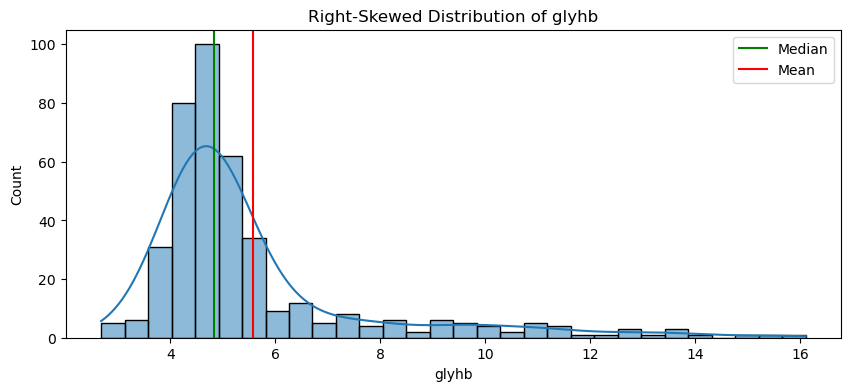

In [469]:
print("Skewness:", df['glyhb'].skew())  

plt.figure(figsize=(10, 4))
sns.histplot(df['glyhb'], kde=True, bins=30)
plt.axvline(df['glyhb'].median(), color='green', label='Median')
plt.axvline(df['glyhb'].mean(), color='red', label='Mean')
plt.legend()
plt.title("Right-Skewed Distribution of glyhb")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


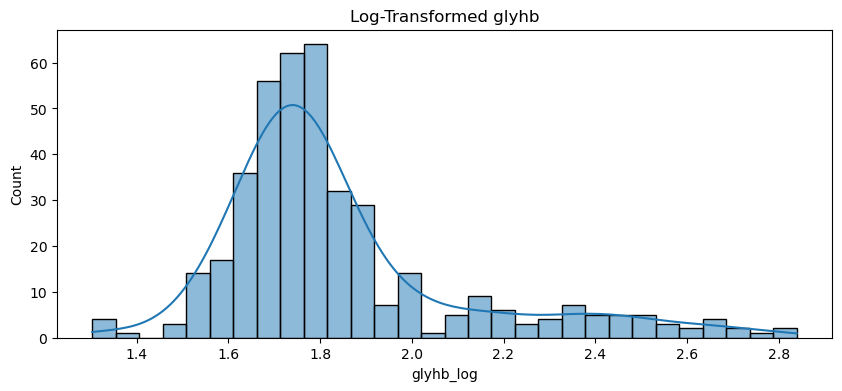

New skewness: 1.5532759489015564


In [470]:
df['glyhb_log'] = np.log1p(df['glyhb'])

plt.figure(figsize=(10, 4))
sns.histplot(df['glyhb_log'], kde=True, bins=30)
plt.title("Log-Transformed glyhb")
plt.show()
print("New skewness:", df['glyhb_log'].skew())

In [471]:
original_cols_to_drop = ['glyhb']
df.drop(columns=original_cols_to_drop, inplace=True, errors='ignore')

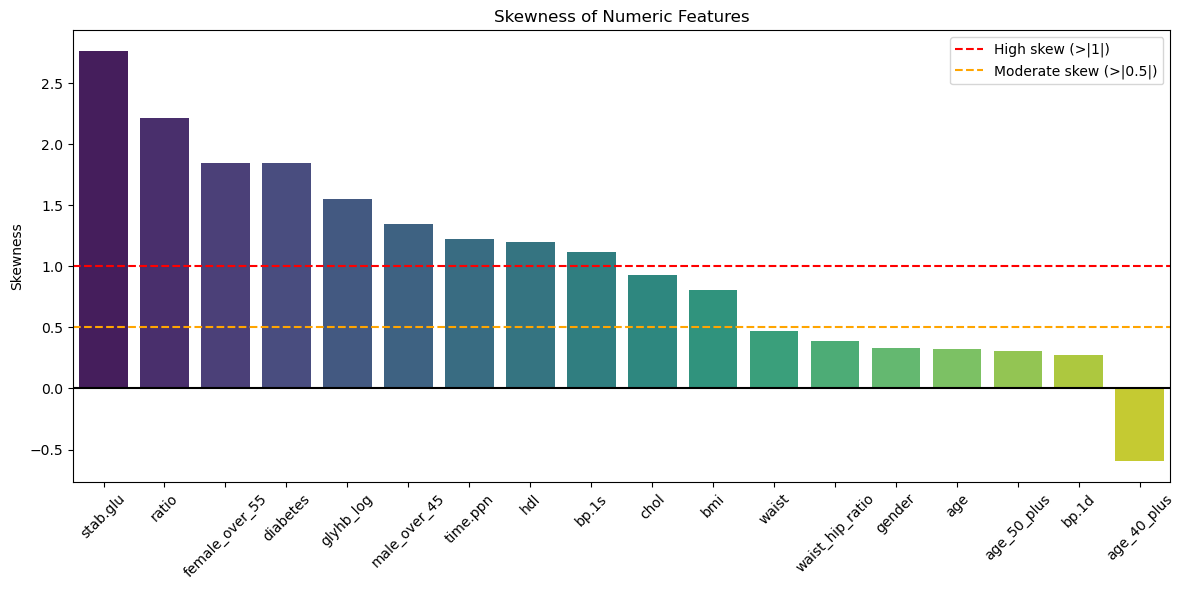

📌 Skewness of features:
stab.glu           2.766131
ratio              2.216253
female_over_55     1.848710
diabetes           1.848710
glyhb_log          1.553276
male_over_45       1.350964
time.ppn           1.222988
hdl                1.199732
bp.1s              1.118723
chol               0.931195
bmi                0.810544
waist              0.472524
waist_hip_ratio    0.385861
gender             0.328083
age                0.321855
age_50_plus        0.307404
bp.1d              0.274148
age_40_plus       -0.597706
dtype: float64


In [472]:
numeric_cols = df.select_dtypes(include=[np.number])

skew_values = numeric_cols.skew().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Features")
plt.axhline(y=1, color='r', linestyle='--', label='High skew (>|1|)')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Moderate skew (>|0.5|)')
plt.axhline(y=0, color='black', linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()

print("📌 Skewness of features:")
print(skew_values)

In [473]:
from sklearn.preprocessing import PowerTransformer

df['stab.glu_yeo'] = PowerTransformer(method='yeo-johnson').fit_transform(df[['stab.glu']])
df['ratio_log'] = np.log1p(df['ratio'])
df['time.ppn_sqrt'] = np.sqrt(df['time.ppn'])
df['hdl_log'] = np.log1p(df['hdl'])


In [474]:
original_cols_to_drop = ['stab.glu', 'ratio', 'time.ppn']
df.drop(columns=original_cols_to_drop, inplace=True, errors='ignore')

In [475]:
df.head()

,chol,hdl,age,gender,bp.1s,bp.1d,waist,diabetes,bmi,waist_hip_ratio,age_40_plus,age_50_plus,male_over_45,female_over_55,glyhb_log,stab.glu_yeo,ratio_log,time.ppn_sqrt,hdl_log
0,203.0,56.0,46,0,118.0,59.0,29.0,0,22.130944,0.763158,1,0,0,0,1.669592,-0.468911,1.526056,26.832816,4.043051
1,165.0,24.0,29,0,112.0,68.0,46.0,0,37.419200,0.958333,0,0,0,0,1.693779,0.206912,2.066863,18.973666,3.218876
2,228.0,37.0,58,0,190.0,92.0,49.0,0,48.370241,0.859649,1,1,0,1,1.729884,0.011857,1.974081,13.416408,3.637586
3,78.0,12.0,67,1,110.0,50.0,33.0,0,18.637828,0.868421,1,1,1,0,1.728109,0.052956,2.014903,21.908902,2.564949
4,249.0,28.0,64,1,138.0,80.0,44.0,1,27.824747,1.073171,1,1,1,0,2.165619,-0.073756,2.292535,17.320508,3.367296


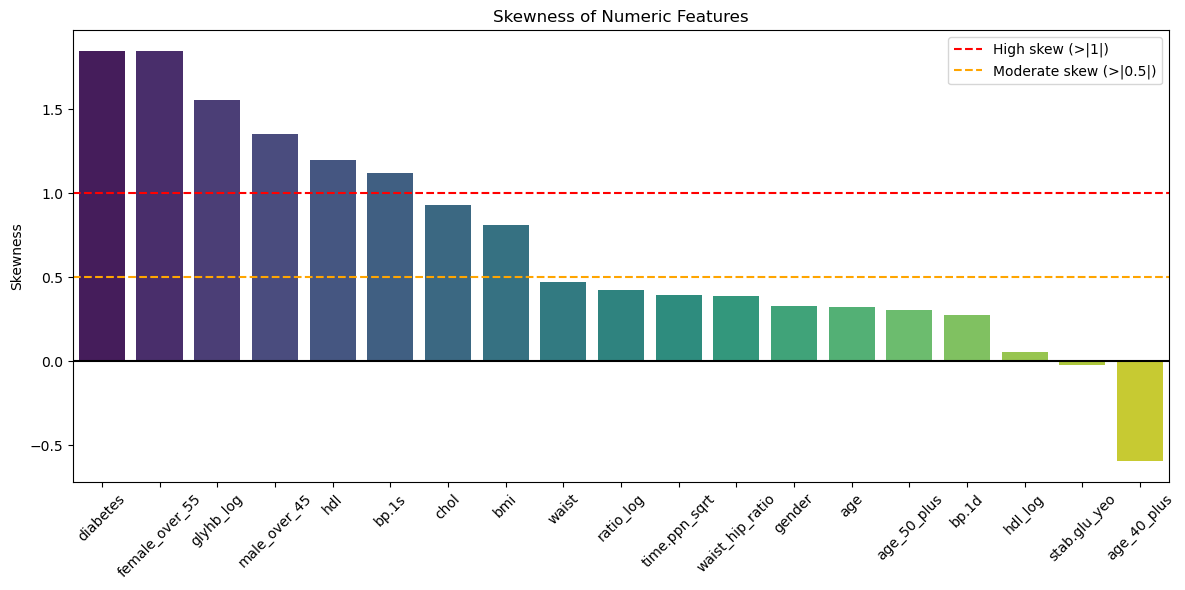

📌 Skewness of features:
diabetes           1.848710
female_over_55     1.848710
glyhb_log          1.553276
male_over_45       1.350964
hdl                1.199732
bp.1s              1.118723
chol               0.931195
bmi                0.810544
waist              0.472524
ratio_log          0.426143
time.ppn_sqrt      0.395948
waist_hip_ratio    0.385861
gender             0.328083
age                0.321855
age_50_plus        0.307404
bp.1d              0.274148
hdl_log            0.056960
stab.glu_yeo      -0.021725
age_40_plus       -0.597706
dtype: float64


In [476]:
numeric_cols = df.select_dtypes(include=[np.number])

skew_values = numeric_cols.skew().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Features")
plt.axhline(y=1, color='r', linestyle='--', label='High skew (>|1|)')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Moderate skew (>|0.5|)')
plt.axhline(y=0, color='black', linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()

print("📌 Skewness of features:")
print(skew_values)

             chol         hdl         age      gender       bp.1s       bp.1d  \
count  403.000000  403.000000  403.000000  403.000000  403.000000  403.000000   
mean   207.845771   50.434243   46.851117    0.419355  136.893300   83.321608   
std     44.390242   17.242563   16.312333    0.494067   22.599389   13.504452   
min     78.000000   12.000000   19.000000    0.000000   90.000000   48.000000   
25%    179.000000   38.000000   34.000000    0.000000  122.000000   75.000000   
50%    204.000000   46.000000   45.000000    0.000000  136.000000   82.000000   
75%    230.000000   59.000000   60.000000    1.000000  146.000000   90.000000   
max    443.000000  120.000000   92.000000    1.000000  250.000000  124.000000   

            waist         bmi  waist_hip_ratio   glyhb_log  stab.glu_yeo  \
count  403.000000  403.000000       403.000000  403.000000  4.030000e+02   
mean    37.900249   28.752087         0.880930    1.840358 -3.610897e-13   
std      5.715043    6.592732         0.07

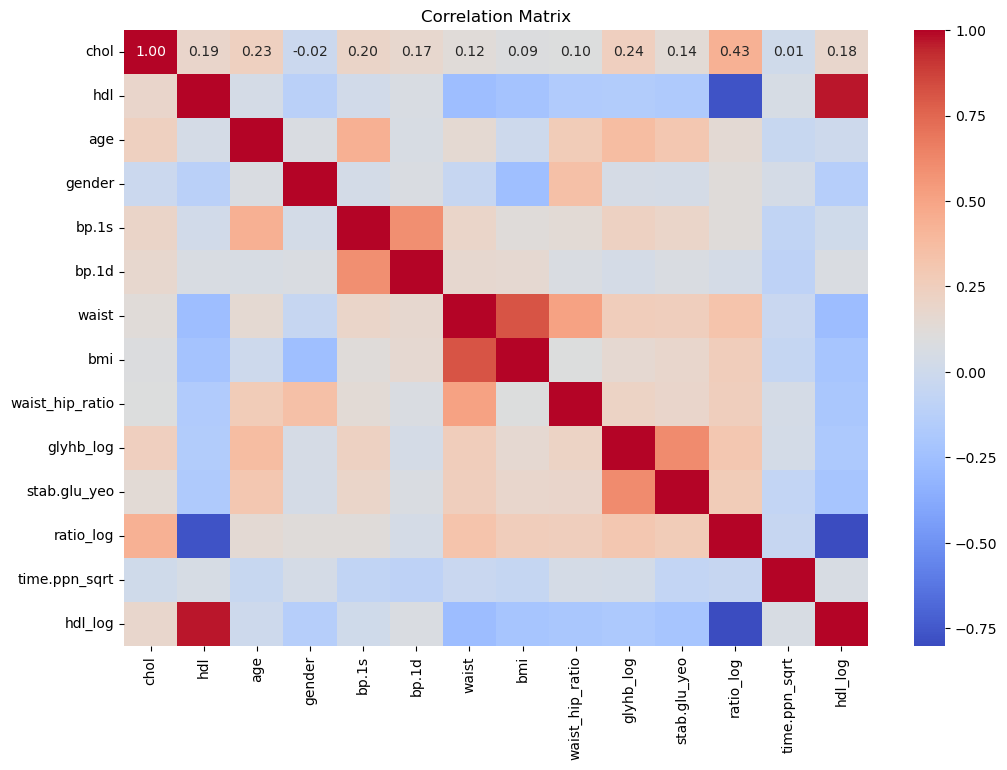

In [477]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(df[numeric_cols].describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [478]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [f for f in numeric_features if f not in ['diabetes', 'glyhb_log']]  # Exclude targets

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i) 
                   for i in range(len(numeric_features))]

# Sort VIF by descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

            feature         VIF
12          hdl_log  551.728697
8   waist_hip_ratio  381.986406
10        ratio_log  328.820364
6             waist  301.955093
1               hdl  162.912909
7               bmi  102.707282
0              chol  100.326941
4             bp.1s   80.160325
5             bp.1d   70.174635
2               age   14.740621
11    time.ppn_sqrt    5.140131
3            gender    2.256718
9      stab.glu_yeo    1.223460


In [479]:
cols_to_drop = ['chol', 'ratio_log', 'waist', 'hdl_log']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [480]:
#Because these features are the same and correlated we will combine them
df['bp_mean'] = df[['bp.1s', 'bp.1d']].mean(axis=1)
df = df.drop(columns=['bp.1s', 'bp.1d'])

In [481]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [f for f in numeric_features if f not in ['diabetes', 'glyhb_log']]  # Exclude targets

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i) 
                   for i in range(len(numeric_features))]

# Sort VIF by descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

           feature        VIF
4  waist_hip_ratio  71.416275
7          bp_mean  48.828373
3              bmi  24.310104
1              age  11.906972
0              hdl   9.920731
6    time.ppn_sqrt   5.046554
2           gender   2.170422
5     stab.glu_yeo   1.161850


In [482]:
cols_to_drop = ['waist_hip_ratio','bp_mean']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [483]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [f for f in numeric_features if f not in ['diabetes', 'glyhb_log']]  # Exclude targets

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i) 
                   for i in range(len(numeric_features))]

# Sort VIF by descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

         feature       VIF
3            bmi  9.238666
1            age  8.915308
0            hdl  7.644949
5  time.ppn_sqrt  4.699978
2         gender  1.700088
4   stab.glu_yeo  1.148680


AttributeError: 'numpy.int32' object has no attribute 'startswith'

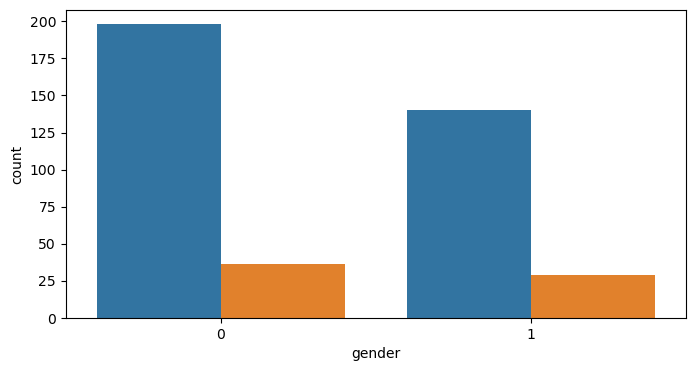

In [484]:
cat_cols = ['gender', 'location', 'frame']  # Adjust based on your data

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='diabetes', data=df)
    plt.title(f"Diabetes Cases by {col}")
    plt.show()

print(pd.crosstab(df['gender'], df['diabetes'], normalize='index'))

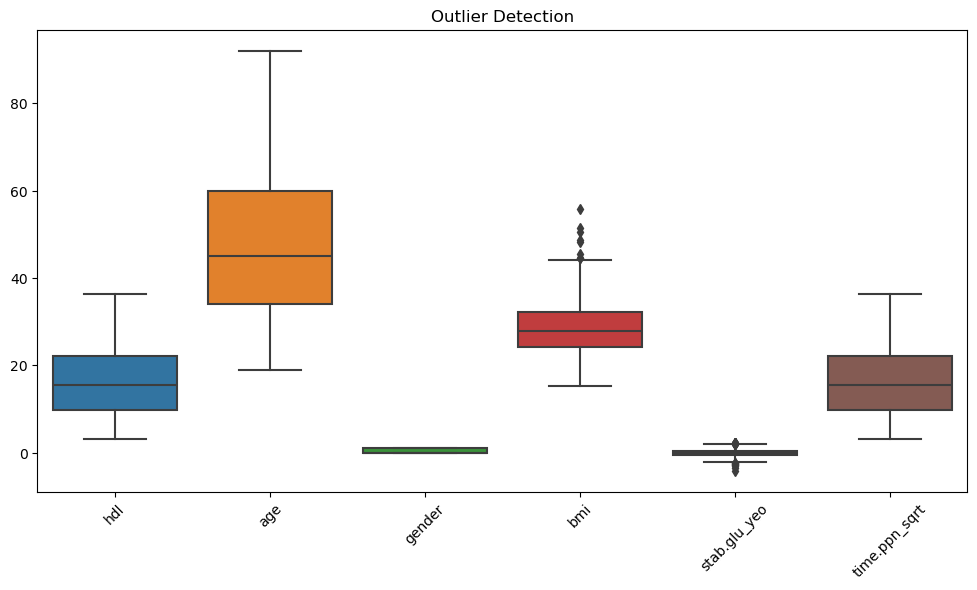

Outliers in glyhb:
     glyhb_log
32    2.804572
58    2.687847
62    2.728506
161   2.681022
362   2.768832
398   2.839663
400   2.683074


In [500]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [f for f in numeric_features if f not in ['diabetes', 'glyhb_log']]  # Exclude targets

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()

from scipy import stats
z_scores = np.abs(stats.zscore(df['glyhb_log']))
outliers = df[z_scores > 3]
print(f"Outliers in glyhb:\n{outliers[['glyhb_log']]}")

In [498]:
# Cap BMI at 60 because grater than 60 is severe obesity threshold
df['bmi'] = df['bmi'].clip(upper=60)

In [501]:
from scipy.stats.mstats import winsorize
# Use Winsorize trnasformation on time.ppn_sqrt and stb.glu_yeo
df['hdl'] = winsorize(df['time.ppn_sqrt'], limits=[0.01, 0.01])
df['stab.glu_yeo'] = winsorize(df['stab.glu_yeo'], limits=[0.01, 0.01])


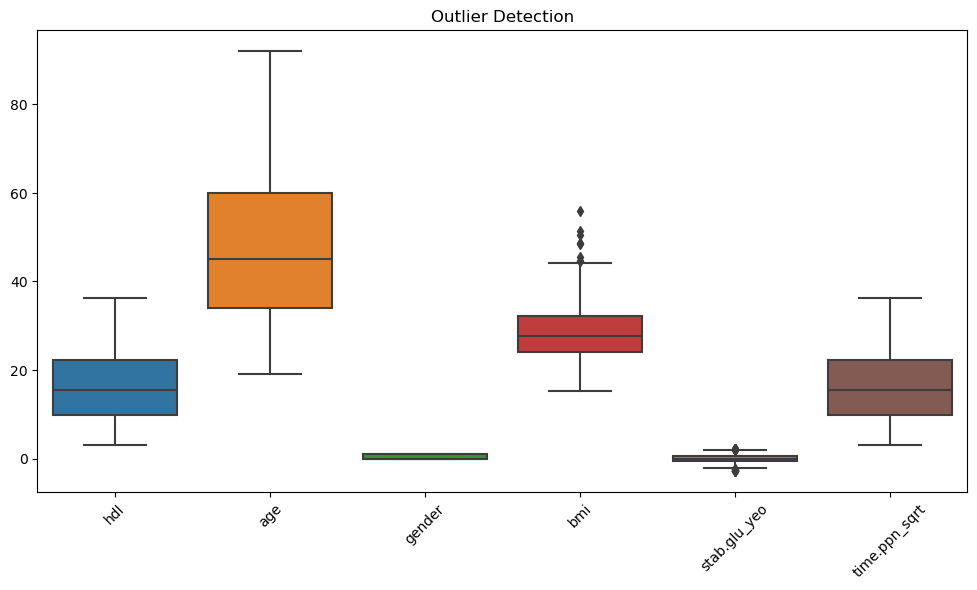

Outliers in glyhb:
     glyhb_log
32    2.804572
58    2.687847
62    2.728506
161   2.681022
362   2.768832
398   2.839663
400   2.683074


In [502]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()

from scipy import stats
z_scores = np.abs(stats.zscore(df['glyhb_log']))
outliers = df[z_scores > 3]
print(f"Outliers in glyhb:\n{outliers[['glyhb_log']]}")

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hdl             403 non-null    float64
 1   age             403 non-null    int64  
 2   gender          403 non-null    int64  
 3   diabetes        403 non-null    int32  
 4   bmi             403 non-null    float64
 5   age_40_plus     403 non-null    int32  
 6   age_50_plus     403 non-null    int32  
 7   male_over_45    403 non-null    int32  
 8   female_over_55  403 non-null    int32  
 9   glyhb_log       403 non-null    float64
 10  stab.glu_yeo    403 non-null    float64
 11  time.ppn_sqrt   403 non-null    float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 30.0 KB


In [532]:
# Separate features and target
X = df.drop(columns=['diabetes', 'glyhb_log'])  # Exclude targets
y = df['diabetes']

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [534]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train = X_train_res
y_train = y_train_res
print(pd.Series(y_train).value_counts())

diabetes
0    272
1    272
Name: count, dtype: int64


In [535]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [536]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [537]:
## Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # No scaling needed for trees

RandomForestClassifier(random_state=42)

In [538]:
## Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [544]:
## KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [553]:
## GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [550]:
##GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [554]:
## DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [555]:
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'SVM': svm,"K-Nearest Neighbors": knn,"Gradient Boosting": gb,"Naive Bayes": nb,"Decision Tree": dt}

In [565]:
for name, model in models.items():
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test_scaled if name != 'Random Forest' else X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.8518518518518519
Confusion Matrix:
 [[54 12]
 [ 0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        66
           1       0.56      1.00      0.71        15

    accuracy                           0.85        81
   macro avg       0.78      0.91      0.81        81
weighted avg       0.92      0.85      0.87        81


--- Random Forest ---
Accuracy: 0.8765432098765432
Confusion Matrix:
 [[60  6]
 [ 4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.65      0.73      0.69        15

    accuracy                           0.88        81
   macro avg       0.79      0.82      0.81        81
weighted avg       0.88      0.88      0.88        81


--- SVM ---
Accuracy: 0.9259259259259259
Confusion Matrix:
 [[61  5]
 [ 1 14]]
Classification Report:
         

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

In [558]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Naive Bayes': {
        # GaussianNB has no hyperparameters worth tuning typically,
        # but we can still wrap it to keep the process uniform
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    }
}

scaled_models = ['Logistic Regression', 'SVM', 'K-Nearest Neighbors', 'Gradient Boosting', 'Naive Bayes']
best_models = {}

for name, model in models.items():
    print(f"\nTuning: {name}")
    
    
    X_train_input = X_train_scaled if name in scaled_models else X_train
    
    if name == 'Naive Bayes':
        # GaussianNB has no meaningful hyperparams, so skip tuning
        best_models[name] = model
        print("No hyperparameter tuning required for Naive Bayes.")
        continue

    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_input, y_train)
    
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    
    best_models[name] = grid.best_estimator_



Tuning: Logistic Regression
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.8621644580360176

Tuning: Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9412164458036019

Tuning: SVM
Best Params: {'C': 10, 'kernel': 'rbf'}
Best CV Score: 0.9301053346924906

Tuning: K-Nearest Neighbors
Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV Score: 0.9080020387359837

Tuning: Gradient Boosting
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV Score: 0.9320081549439347

Tuning: Naive Bayes
No hyperparameter tuning required for Naive Bayes.

Tuning: Decision Tree
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best CV Score: 0.8989296636085629
